In [23]:
import pandas as pd 
import numpy as np 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
pd.options.display.max_rows = 10

In [25]:
df1 = pd.read_csv('city_data_Rabat.csv', index_col='year')

In [26]:
df1.head()

,city,country,avg_temp
year,,,
1753,Rabat,Morocco,17.31
1754,Rabat,Morocco,17.47
1755,Rabat,Morocco,17.16
1756,Rabat,Morocco,17.53
1757,Rabat,Morocco,17.42


In [27]:
df1['MA-RABAT-10'] = df1.iloc[:,2].rolling(window=10).mean().round(2)

In [28]:
df1

,city,country,avg_temp,MA-RABAT-10
year,,,,
1753,Rabat,Morocco,17.31,NaN
1754,Rabat,Morocco,17.47,NaN
1755,Rabat,Morocco,17.16,NaN
1756,Rabat,Morocco,17.53,NaN
1757,Rabat,Morocco,17.42,NaN
...,...,...,...,...
2009,Rabat,Morocco,18.73,18.29
2010,Rabat,Morocco,18.87,18.36
2011,Rabat,Morocco,18.59,18.36


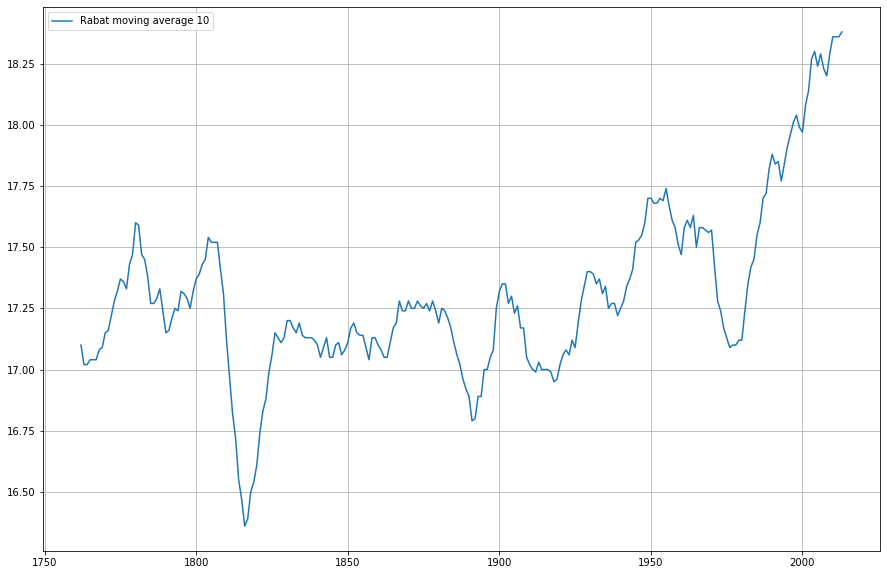

In [29]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df1['MA-RABAT-10'],label='Rabat moving average 10')
plt.legend(loc=2)

In [30]:
df2 = pd.read_csv('Global_data.csv', index_col='year')

In [31]:
df2.head()

,avg_temp
year,
1750,8.72
1751,7.98
1752,5.78
1753,8.39
1754,8.47


In [32]:
df2.drop([1750,1751,1752,2014,2015], inplace=True)

In [33]:
df2['Global-MA-10'] = df2.iloc[:,0].rolling(window=10).mean().round(2)

In [34]:
df2

,avg_temp,Global-MA-10
year,,
1753,8.39,NaN
1754,8.47,NaN
1755,8.36,NaN
1756,8.85,NaN
1757,9.02,NaN
...,...,...
2009,9.51,9.49
2010,9.70,9.54
2011,9.52,9.55


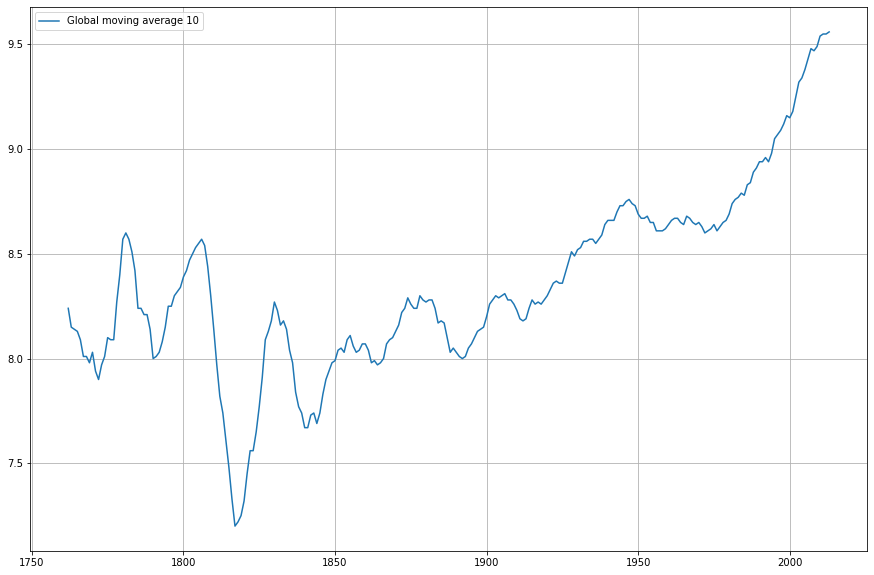

In [35]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df2['Global-MA-10'],label='Global moving average 10')
plt.legend(loc=2)

In [36]:
Rabat_MA = df1.iloc[:, 3]

In [37]:
Global_MA = df2.iloc[:,1]

In [38]:
MA_10 = pd.DataFrame(data=[Rabat_MA, Global_MA])

In [39]:
MA_10

year,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
MA-RABAT-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.10,...,18.30,18.24,18.29,18.23,18.20,18.29,18.36,18.36,18.36,18.38
Global-MA-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.24,...,9.34,9.38,9.43,9.48,9.47,9.49,9.54,9.55,9.55,9.56


In [40]:
Trend = MA_10.T

In [41]:
Trend

,MA-RABAT-10,Global-MA-10
year,,
1753,NaN,NaN
1754,NaN,NaN
1755,NaN,NaN
1756,NaN,NaN
1757,NaN,NaN
...,...,...
2009,18.29,9.49
2010,18.36,9.54
2011,18.36,9.55


In [44]:
Trend.describe().round(2)

,MA-RABAT-10,Global-MA-10
count,252.00,252.00
mean,17.30,8.35
std,0.36,0.44
min,16.36,7.20
25%,17.10,8.07
50%,17.24,8.28
75%,17.45,8.64
max,18.38,9.56


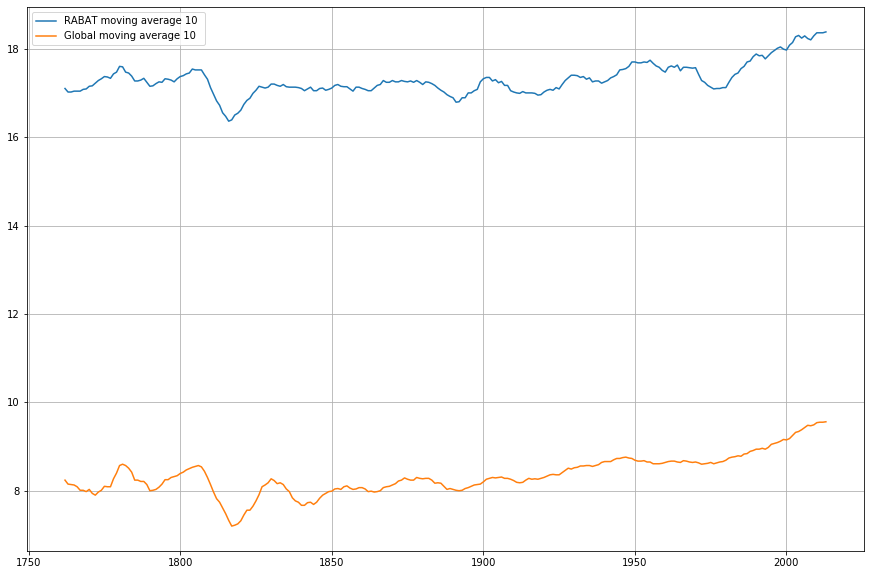

In [43]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(Trend['MA-RABAT-10'],label='RABAT moving average 10 ')
plt.plot(Trend['Global-MA-10'],label='Global moving average 10')
plt.legend(loc=2)